In [4]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline

In [7]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing TEM data
TEM_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'TEM', '20230205-SOL', 'p1-auss-dna-s1', '')

# get the path to the folder containing all the plots
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')

In [8]:
'''
Import example data from UV-Vis-NIR folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
df = pd.read_csv(TEM_DIR_PATH+'Results_3figures.csv')
mean_diameter = (df['Major'] + df['Minor']) / 2
df['Mean_diameter'] = mean_diameter
df

,,Label,Major,Minor,Angle,Mean_diameter
0,1,NaN,28.9,26.8,175.5,27.85
1,2,NaN,32.5,31.4,88.9,31.95
2,3,NaN,23.3,20.9,114.9,22.10
3,4,NaN,26.0,23.3,179.7,24.65
4,5,NaN,29.1,28.2,137.7,28.65
...,...,...,...,...,...,...
231,232,NaN,33.2,31.7,160.6,32.45
232,233,NaN,29.9,28.4,132.9,29.15
233,234,NaN,30.5,28.1,159.1,29.30
234,235,NaN,31.4,29.6,47.7,30.50


In [11]:
mean = round(df['Mean_diameter'].mean(), 1)
stdev = round(df['Mean_diameter'].std(), 1)
diameter = print('Size: ', mean, '$\pm$', stdev, 'nm')
print('Mean of the distribution is:', mean)
print('Standard deviation of the distribution is:', stdev)

Size:  28.2 $\pm$ 2.4 nm
Mean of the distribution is: 28.2
Standard deviation of the distribution is: 2.4


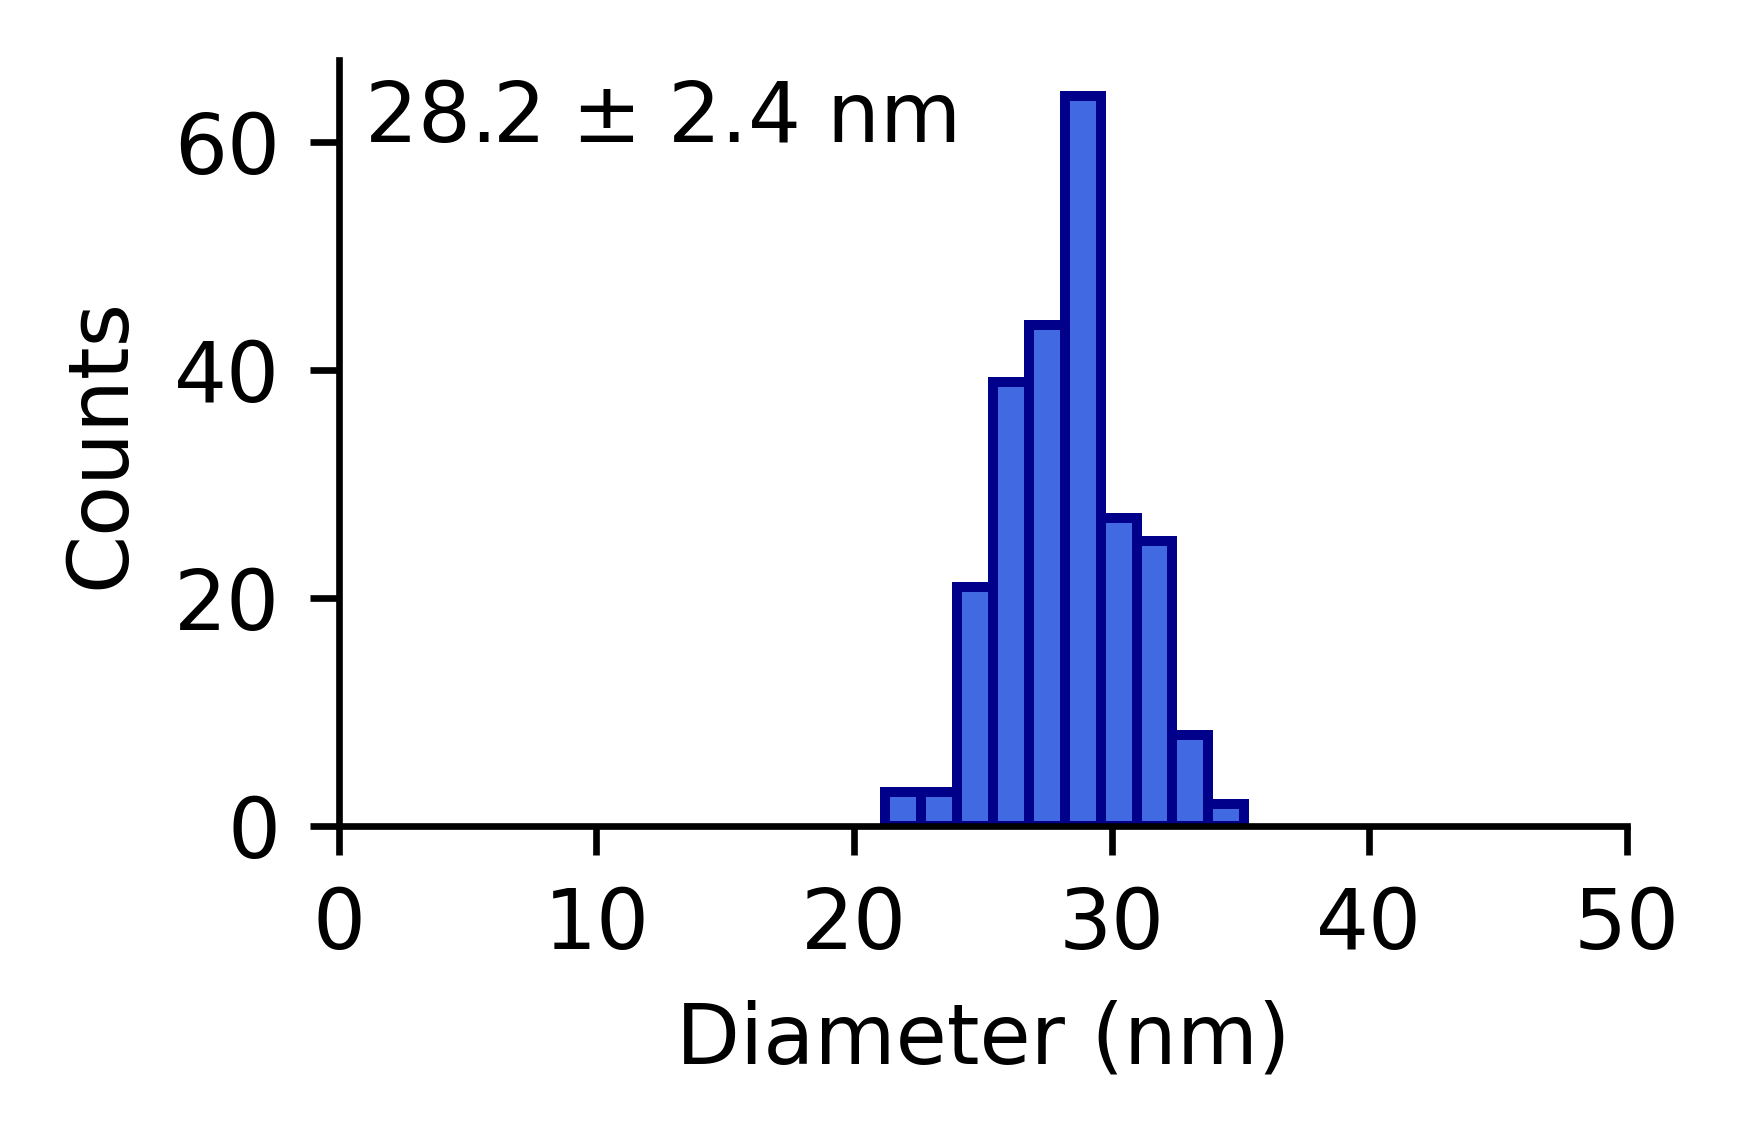

In [15]:
'''
Make a simple figure containing normalized data 
'''
#================ plot data ===========================#

fig = plt.figure(figsize=(3,2), dpi=600) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax.hist(df['Mean_diameter'], color = 'royalblue', edgecolor = 'darkblue', linewidth = 1.2)                           # plot data
ax.set_xlim([0,50])                    # set wavelength limit
#ax.set_ylim([0,1.1])                       # set absorbance limit
ax.set_xlabel(r'Diameter (nm)')          # set axis label
ax.set_ylabel(r'Counts')              # set axis label

# #================ plot stylisation ====================#

ax.spines['right'].set_visible(False)      # remove spines
ax.spines['top'].set_visible(False)
ax.annotate('28.2 $\pm$ 2.4 nm', (1,60))

plt.tight_layout()  
fig.savefig(RESULT_DIR_PATH+'Fig_S1_b.jpeg')